<a href="https://colab.research.google.com/github/dandamudi-geeta/Reinforcement-Learning/blob/main/2348512_RL(Lab9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Define the Simulated Environment**

In [1]:
import numpy as np
import random

In [2]:
class GridWorld:
    """
    Simple 1D grid world with 5 states.
    The agent can move left (-1) or right (+1).
    Rewards:
    - Goal state (5): +1 reward
    - Start state (1): 0 reward
    - Other states: 0 reward
    """
    def __init__(self):
        self.states = [1, 2, 3, 4, 5]
        self.start_state = 1
        self.goal_state = 5
        self.current_state = self.start_state

    def reset(self):
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        """
        Takes an action and updates the state.
        Args:
            action (int): -1 (left) or +1 (right)
        Returns:
            next_state (int): The updated state.
            reward (float): Reward received.
            done (bool): Whether the episode is complete.
        """
        if action not in [-1, 1]:
            raise ValueError("Invalid action. Choose -1 (left) or +1 (right).")

        # Update state
        self.current_state += action
        self.current_state = max(self.states[0], min(self.current_state, self.states[-1]))

        # Check if the agent reached the goal state
        if self.current_state == self.goal_state:
            return self.current_state, 1, True
        else:
            return self.current_state, 0, False

**Step 2: Define the Temporal-Difference Learning Algorithm**

In [3]:
def temporal_difference_learning(env, alpha=0.1, gamma=0.9, episodes=100):
    """
    Temporal Difference Learning (TD(0)) algorithm.

    Args:
        env (GridWorld): The environment.
        alpha (float): Learning rate.
        gamma (float): Discount factor.
        episodes (int): Number of episodes for training.

    Returns:
        V (dict): Value function for all states.
    """
    # Initialize the value function for each state
    V = {state: 0.0 for state in env.states}

    for episode in range(episodes):
        state = env.reset()
        done = False
        print(f"Episode {episode + 1}:")

        while not done:
            # Choose a random action
            action = random.choice([-1, 1])

            # Take a step in the environment
            next_state, reward, done = env.step(action)

            # TD(0) Update Rule
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            # Debugging information
            print(f"State {state}, Action {action}, Next State {next_state}, Reward {reward}, Value {V[state]:.2f}")

            # Move to the next state
            state = next_state

    return V


**Step 3: Run the Simulation**

In [4]:
# Instantiate the environment
env = GridWorld()

In [5]:

# Set parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
episodes = 50  # Number of episodes

In [13]:
# Train the agent using TD(0)
value_function = temporal_difference_learning(env, alpha=alpha, gamma=gamma, episodes=episodes)



Episode 1:
State 1, Action 1, Next State 2, Reward 0, Value 0.00
State 2, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action 1, Next State 2, Reward 0, Value 0.00
State 2, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action 1, Next State 2, Reward 0, Value 0.00
State 2, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action 1, Next State 2, Reward 0, Value 0.00
State 2, Action 1, Next State 3, Reward 0, Value 0.00
State 3, Action -1, Next State 2, Reward 0, Value 0.00
State 2, Action -1, Next State 1, Reward 0, Value 0.00
State 1, Action 1, Next State 2, Reward 0, Value 0.00
State 2, Action 1, Next State 3, Reward 0, Value 0.00
State 3, Action -1, Next State 2, Reward 0, Value 0.00
State 2, Action 1, Next State 3, Reward 0, Value 0.00
State 3

In [11]:

# Display the value function
print("\nLearned Value Function:")
for state, value in value_function.items():
    print(f"State {state}: {value:.2f}")


Learned Value Function:
State 1: 0.27
State 2: 0.36
State 3: 0.46
State 4: 0.67
State 5: 0.00


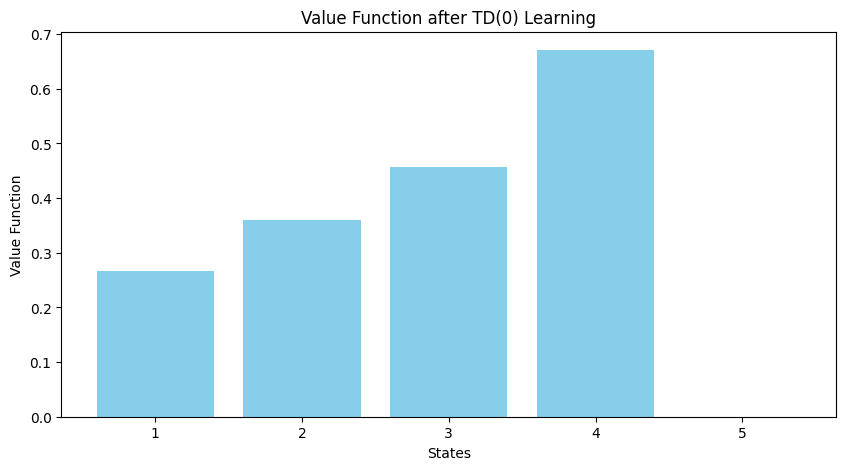

In [9]:
import matplotlib.pyplot as plt

# Bar chart for value function
plt.figure(figsize=(10, 5))
plt.bar(value_function.keys(), value_function.values(), color='skyblue')
plt.xlabel("States")
plt.ylabel("Value Function")
plt.title("Value Function after TD(0) Learning")
plt.show()